## brownian evolution in a circle

1. pick a random starting point on a circle
2. for each time unit draw from the gaussian corrected for the circle, N(0,rt)
3. update position


In [12]:
import math
import random
import matplotlib as plt
R = 1 #radius
centerX = 0
centerY = 0


def rndCirclePoints(radius centerX=0, centerY=0)
    r = radius * math.sqrt(random.random())
    theta = random.random() * 2 * math.pi
    x = centerX + r * math.cos(theta)
    y = centerY + r * math.sin(theta)
    return[x,y]
    
xsamples = []
ysamples = []
for ii in range(100):
    samples.append
    

In [13]:
plt.plot(x,y,'ro') 


AttributeError: module 'matplotlib' has no attribute 'plot'

In [21]:
import matplotlib.pyplot as plt 
import numpy as np 
class Brownian():
    """
    A Brownian motion class constructor
    """
    def __init__(self,x0=0):
        """
        Init class
        """
        assert (type(x0)==float or type(x0)==int or x0 is None), "Expect a float or None for the initial value"
        
        self.x0 = float(x0)
    
    def gen_random_walk(self,n_step=100):
        """
        Generate motion by random walk
        
        Arguments:
            n_step: Number of steps
            
        Returns:
            A NumPy array with `n_steps` points
        """
        # Warning about the small number of steps
        if n_step < 30:
            print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")
        
        w = np.ones(n_step)*self.x0
        
        for i in range(1,n_step):
            # Sampling from the Normal distribution with probability 1/2
            yi = np.random.choice([1,-1])
            # Weiner process
            w[i] = w[i-1]+(yi/np.sqrt(n_step))
        
        return w
    
    def gen_normal(self,n_step=100):
        """
        Generate motion by drawing from the Normal distribution
        
        Arguments:
            n_step: Number of steps
            
        Returns:
            A NumPy array with `n_steps` points
        """
        if n_step < 30:
            print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")
        
        w = np.ones(n_step)*self.x0
        print(w)
        for i in range(1,n_step):
            # Sampling from the Normal distribution
            yi = np.random.normal()
            # Weiner process
            w[i] = w[i-1]+(yi/np.sqrt(n_step))
        
        return w
    
    def gen_HSV_normal(self,n_step=100):
        """
        Generate bounded brownian motion along three axes:
        H
        S
        V
        
        first lets try rescaling BM so it always lies between 0 and 1
        
        
        Arguments:
            n_step: Number of steps
            
        Returns:
            A NumPy array with `n_steps` points
        """
        if n_step < 30:
            print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")
        
        w = np.ones(n_step)*self.x0
        print(w)
        
        for i in range(1,n_step):
            # Sampling from the Normal distribution
            yi = np.random.normal()
            # Weiner process
            w[i] = w[i-1]+(yi/np.sqrt(n_step))
        
        return w
    
    def stock_price(
                    self,
                    s0=100,
                    mu=0.2,
                    sigma=0.68,
                    deltaT=52,
                    dt=0.1
                    ):
        """
        Models a stock price S(t) using the Weiner process W(t) as
        `S(t) = S(0).exp{(mu-(sigma^2/2).t)+sigma.W(t)}`
        
        Arguments:
            s0: Iniital stock price, default 100
            mu: 'Drift' of the stock (upwards or downwards), default 1
            sigma: 'Volatility' of the stock, default 1
            deltaT: The time period for which the future prices are computed, default 52 (as in 52 weeks)
            dt (optional): The granularity of the time-period, default 0.1
        
        Returns:
            s: A NumPy array with the simulated stock prices over the time-period deltaT
        """
        n_step = int(deltaT/dt)
        time_vector = np.linspace(0,deltaT,num=n_step)
        # Stock variation
        stock_var = (mu-(sigma**2/2))*time_vector
        # Forcefully set the initial value to zero for the stock price simulation
        self.x0=0
        # Weiner process (calls the `gen_normal` method)
        weiner_process = sigma*self.gen_normal(n_step)
        # Add two time series, take exponent, and multiply by the initial stock price
        s = s0*(np.exp(stock_var+weiner_process))
        
        return s

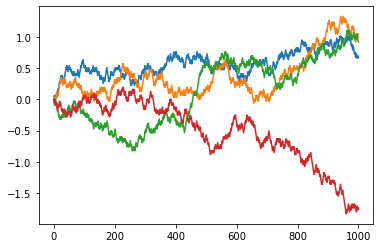

In [22]:
b = Brownian()
for i in range(4):
    plt.plot(b.gen_random_walk(1000))
plt.show()

In [25]:
b.x0

0.0

In [29]:
from scipy.stats import norm

# Process parameters
delta = 0.25
dt = 0.1

# Initial condition.
x = 0.0

# Number of iterations to compute.
n = 20

# Iterate to compute the steps of the Brownian motion.
for k in range(n):
    x = x + norm.rvs(scale=delta**2*dt)
    print(x)

0.00011421196824965859
0.0012976303005199214
0.005014496227160182
0.017960150690831875
0.014736429425345575
0.01284003531265979
0.011849609410933017
0.011325725861776888
0.021749779846699728
0.024924972321294512
0.02047119489641791
0.019745188269771917
0.03784457859350377
0.04723163653897985
0.04934772311593643
0.05570106722338486
0.04982494596126947
0.0591667749784039
0.05310054893274175
0.05532848303982967


In [32]:
"""
brownian() implements one dimensional Brownian motion (i.e. the Wiener process).
"""

# File: brownian.py

from math import sqrt
from scipy.stats import norm
import numpy as np


def brownian(x0, n, dt, delta, out=None):
    """
    Generate an instance of Brownian motion (i.e. the Wiener process):

        X(t) = X(0) + N(0, delta**2 * t; 0, t)

    where N(a,b; t0, t1) is a normally distributed random variable with mean a and
    variance b.  The parameters t0 and t1 make explicit the statistical
    independence of N on different time intervals; that is, if [t0, t1) and
    [t2, t3) are disjoint intervals, then N(a, b; t0, t1) and N(a, b; t2, t3)
    are independent.
    
    Written as an iteration scheme,

        X(t + dt) = X(t) + N(0, delta**2 * dt; t, t+dt)


    If `x0` is an array (or array-like), each value in `x0` is treated as
    an initial condition, and the value returned is a numpy array with one
    more dimension than `x0`.

    Arguments
    ---------
    x0 : float or numpy array (or something that can be converted to a numpy array
         using numpy.asarray(x0)).
        The initial condition(s) (i.e. position(s)) of the Brownian motion.
    n : int
        The number of steps to take.
    dt : float
        The time step.
    delta : float
        delta determines the "speed" of the Brownian motion.  The random variable
        of the position at time t, X(t), has a normal distribution whose mean is
        the position at time t=0 and whose variance is delta**2*t.
    out : numpy array or None
        If `out` is not None, it specifies the array in which to put the
        result.  If `out` is None, a new numpy array is created and returned.

    Returns
    -------
    A numpy array of floats with shape `x0.shape + (n,)`.
    
    Note that the initial value `x0` is not included in the returned array.
    """

    x0 = np.asarray(x0)

    # For each element of x0, generate a sample of n numbers from a
    # normal distribution.
    r = norm.rvs(size=x0.shape + (n,), scale=delta*sqrt(dt))

    # If `out` was not given, create an output array.
    if out is None:
        out = np.empty(r.shape)

    # This computes the Brownian motion by forming the cumulative sum of
    # the random samples. 
    np.cumsum(r, axis=-1, out=out)

    # Add the initial condition.
    out += np.expand_dims(x0, axis=-1)

    return out

In [119]:
t = numpy.linspace(0.0, N*dt, N+1)
t[1]

1.0

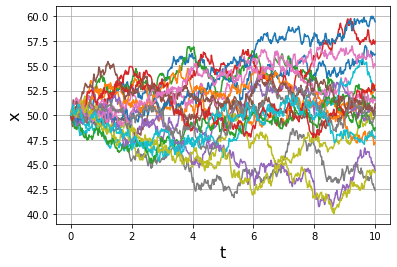

In [33]:
import numpy
from pylab import plot, show, grid, xlabel, ylabel

# The Wiener process parameter.
delta = 2
# Total time.
T = 10.0
# Number of steps.
N = 500
# Time step size
dt = T/N
# Number of realizations to generate.
m = 20
# Create an empty array to store the realizations.
x = numpy.empty((m,N+1))
# Initial values of x.
x[:, 0] = 50

brownian(x[:,0], N, dt, delta, out=x[:,1:])

t = numpy.linspace(0.0, N*dt, N+1)
for k in range(m):
    plot(t, x[k])
xlabel('t', fontsize=16)
ylabel('x', fontsize=16)
grid(True)
show()

In [34]:
## now repeat the above example but use a boundary of

ub = 10.0
lb = 10.0

## if the process exceeds these boundaries it will be reflected back

def boundedBrownian(x0, n, dt, sigma, out=None, ub=None, lb = None):
    
    x0 = np.asarray(x0)

    # For each element of x0, generate a sample of n numbers from a
    # normal distribution.
    r = norm.rvs(size=x0.shape + (n,), scale=sigma*sqrt(dt))

    # If `out` was not given, create an output array.
    if out is None:
        out = np.empty(r.shape)

    # This computes the Brownian motion by forming the cumulative sum of
    # the random samples. 
    np.cumsum(r, axis=-1, out=out)

    # Add the initial condition.
    out += np.expand_dims(x0, axis=-1)

    return out


In [80]:
# The Wiener process parameter.
sigma = 1
# Total time.
T = 10.0
# Number of steps.
N = 10
# Time step size
dt = T/N
# Number of realizations to generate.
m = 1
# Create an empty array to store the realizations.
x = numpy.empty((m,N+1))
# Initial values of x.
x[:, 0] = 0

In [82]:

r = norm.rvs(size=x.shape + (10,), scale=sigma*sqrt(dt))
#r = norm.rvs(size=x0.shape + (n,), scale=delta*sqrt(dt))

In [84]:
a = np.random.randint(-100, 100, 10000)
b = a/100

In [85]:
a

array([ 0, 57, 23, ...,  4, 97, -4])

In [86]:
b

array([ 0.  ,  0.57,  0.23, ...,  0.04,  0.97, -0.04])

In [192]:


def cumsum_with_limits(values, ub, lb):
    ##takes a vector of steps under bm and calculates displacement assuming that boundaries reflect
    cumsum_values = []
    bounded_sum = 0
    for ii, jj in np.ndenumerate(values):
        #print(ii,jj)
        if bounded_sum+jj <= ub and bounded_sum+jj >= lb: 
            bounded_sum += jj
            #print("in between: bounded sum is {}".format(bounded_sum))
            cumsum_values.append(bounded_sum)
        elif bounded_sum+jj >= ub:
            excess = abs((bounded_sum+jj)-ub) # reflect back excess
            #print("at step {} step size is {} causing a hit to ub: reflecting back {}".format(ii, jj, excess))
            bounded_sum = ub - excess
            #print('new position is {}'.format(bounded_sum))
            #print("hit upper: bounded sum is {}".format(bounded_sum))      
            cumsum_values.append(bounded_sum)
        elif bounded_sum+jj <= lb:
            excess = abs(lb-(bounded_sum+jj)) # Remainder to -1
            #print("at step {} step size is {} causing a hit to lb: reflecting back {}".format(ii, jj, excess))
            bounded_sum = lb + excess
            #print('new position is {}'.format(bounded_sum))
            #print("hit lower: bounded sum is {}".format(bounded_sum))
            cumsum_values.append(bounded_sum)
        #print(ii, cumsum_values)
    return cumsum_values

In [193]:
len(b)

100

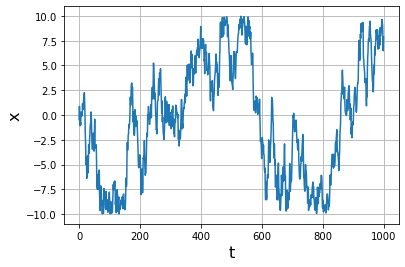

In [198]:
b = np.random.normal(size=1000)
bounded = cumsum_with_limits(b, 10, -10)
#print(bounded)
arr = numpy.array(bounded)
t = numpy.linspace(0.0, len(b), len(b))
plot(t, arr)
xlabel('t', fontsize=16)
ylabel('x', fontsize=16)
grid(True)
show()